# Assigment 9

## 1. Import the data located at this <a href="https://github.com/alexanderquispe/Diplomado_PUCP/blob/main/_data/data_dengue_peru.csv">link</a>. It has information on people infected with dengue at the district level for 2015 to 2021.

In [1]:
!pip install geopandas
!pip install folium

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap
import chardet

In [3]:
# Gettting the character format

base = open(r'../../_data/data_dengue_peru.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'UTF-8-SIG'

In [4]:
data_dengue = pd.read_csv(r'../../_data/data_dengue_peru.csv', encoding = charenc)
data_dengue

C:\Users\hecto\AppData\Local\Temp\ipykernel_53476\1213817334.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_dengue = pd.read_csv( r'C:/Users/hecto/OneDrive/Documents/GitHub/Diplomado_PUCP/_data/data_dengue_peru.csv', encoding = charenc)


,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


In [5]:
data_dengue.dtypes

Año                 int64
Semana              int64
Eventos o daños    object
Departamento       object
Distrito           object
Provincia          object
Ubigeo              int64
Casos              object
dtype: object

## 2. Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use this <a href="https://stackoverflow.com/questions/35552874/get-first-letter-of-a-string-from-column">code</a>.

In [6]:
data_dengue['Ubigeo'] = data_dengue['Ubigeo'].astype('string')

for i in range(len(data_dengue.index)):
    if len(data_dengue['Ubigeo'][i]) == 5:
        data_dengue['Ubigeo'][i] = '0' + data_dengue['Ubigeo'][i]
    else:
        data_dengue['Ubigeo'][i] = data_dengue['Ubigeo'][i]
#data_dengue['Ubigeo'] = pd.to_numeric(data_dengue['Ubigeo'])

data_dengue['Ubigeo_dep'] = [x[0:2] for x in data_dengue['Ubigeo']]
data_dengue['Ubigeo_prov'] = [z[0:4] for z in data_dengue['Ubigeo']]

data_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_dep,Ubigeo_prov
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0,08,0809
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


In [7]:
data_dengue.dtypes

Año                 int64
Semana              int64
Eventos o daños    object
Departamento       object
Distrito           object
Provincia          object
Ubigeo             string
Casos              object
Ubigeo_dep         object
Ubigeo_prov        object
dtype: object

## 3. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this <a href="https://github.com/alexanderquispe/Diplomado_PUCP/tree/main/_data/LIMITE_DISTRITAL_2020_INEI">this shapefile</a>.

In [8]:
# Upload shape file at district level
shape_file = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')
shape_file

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [9]:
data_dengue['Año'] = data_dengue['Año'].astype('string')
data_dengue = data_dengue.rename(columns={'Ubigeo':'UBIGEO'})
dengue2021 = data_dengue.loc[data_dengue.Año == '2021', :].reset_index( drop = True )
dengue2021 = dengue2021.loc[:, ['Año', 'Semana', 'Departamento', 'Provincia', 'Distrito', 'UBIGEO', 'Ubigeo_prov', 'Ubigeo_dep', 'Casos']]
#dengue2021['Casos'] = pd.to_numeric(dengue2021['Casos'],errors='coerce').astype(pd.Int64Dtype())
dengue2021 = dengue2021.dropna()
dengue2021['Casos'] = dengue2021['Casos'].astype('int')
dengue2021

,Año,Semana,Departamento,Provincia,Distrito,UBIGEO,Ubigeo_prov,Ubigeo_dep,Casos
39,2021,3,CUSCO,LA CONVENCION,MEGANTONI,080914,0809,08,0
1478,2021,4,CUSCO,LA CONVENCION,MEGANTONI,080914,0809,08,0
1479,2021,2,CUSCO,LA CONVENCION,MEGANTONI,080914,0809,08,0
1526,2021,6,CUSCO,LA CONVENCION,MEGANTONI,080914,0809,08,0
1527,2021,8,CUSCO,LA CONVENCION,MEGANTONI,080914,0809,08,0
...,...,...,...,...,...,...,...,...,...
24625,2021,14,ICA,CHINCHA,SUNAMPE,110210,1102,11,2
24626,2021,14,LA LIBERTAD,PACASMAYO,PACASMAYO,130704,1307,13,1
24627,2021,15,LA LIBERTAD,CHEPEN,CHEPEN,130401,1304,13,2
24628,2021,16,LA LIBERTAD,CHEPEN,CHEPEN,130401,1304,13,2


In [10]:
#dengue2021['Casos'].unique()
dengue2021.dtypes

Año             string
Semana           int64
Departamento    object
Provincia       object
Distrito        object
UBIGEO          string
Ubigeo_prov     object
Ubigeo_dep      object
Casos            int32
dtype: object

In [11]:
dengue2021_dist = dengue2021.groupby( ['Departamento', 'Provincia','Distrito', 'UBIGEO', 'Ubigeo_prov', 'Ubigeo_dep'], as_index = False).agg(Total_casos=('Casos', 'sum'))
dengue2021_dist

,Departamento,Provincia,Distrito,UBIGEO,Ubigeo_prov,Ubigeo_dep,Total_casos
0,AMAZONAS,BAGUA,ARAMANGO,010202,0102,01,25
1,AMAZONAS,BAGUA,BAGUA,010201,0102,01,474
2,AMAZONAS,BAGUA,COPALLIN,010203,0102,01,38
3,AMAZONAS,BAGUA,EL PARCO,010204,0102,01,8
4,AMAZONAS,BAGUA,IMAZA,010205,0102,01,109
...,...,...,...,...,...,...,...
464,UCAYALI,PADRE ABAD,CURIMANA,250303,2503,25,32
465,UCAYALI,PADRE ABAD,IRAZOLA,250302,2503,25,26
466,UCAYALI,PADRE ABAD,NESHUYA,250304,2503,25,14
467,UCAYALI,PADRE ABAD,PADRE ABAD,250301,2503,25,119


In [12]:
geo_dist = shape_file.loc[:,['CCDD', 'IDPROV', 'UBIGEO', 'geometry', 'NOMBDEP', 'NOMBPROV', 'NOMBDIST']].reset_index( drop = True)
#geo_dep = geo_dep.drop_duplicates( subset=['UBIGEO', 'geometry']).reset_index( drop = True)
geo_dist

,CCDD,IDPROV,UBIGEO,geometry,NOMBDEP,NOMBPROV,NOMBDIST
0,06,0605,060504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...",CAJAMARCA,CONTUMAZA,GUZMANGO
1,06,0611,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",CAJAMARCA,SAN MIGUEL,EL PRADO
2,06,0611,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",CAJAMARCA,SAN MIGUEL,NIEPOS
3,06,0611,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",CAJAMARCA,SAN MIGUEL,SAN GREGORIO
4,06,0612,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",CAJAMARCA,SAN PABLO,SAN LUIS
...,...,...,...,...,...,...,...
1869,04,0404,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...",AREQUIPA,CASTILLA,CHACHAS
1870,04,0404,040405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2...",AREQUIPA,CASTILLA,CHILCAYMARCA
1871,04,0404,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...",AREQUIPA,CASTILLA,CHOCO
1872,04,0404,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...",AREQUIPA,CASTILLA,HUANCARQUI


In [13]:
dengue_2021_dist = pd.merge(geo_dist, dengue2021_dist, how='left', on=['UBIGEO'])
dengue_2021_dist = dengue_2021_dist.drop(columns=['Departamento','Provincia','Distrito'])
dengue_2021_dist['UBIGEO'] = dengue_2021_dist['UBIGEO'].astype(str).astype(int)
dengue_2021_dist

,CCDD,IDPROV,UBIGEO,geometry,NOMBDEP,NOMBPROV,NOMBDIST,Ubigeo_prov,Ubigeo_dep,Total_casos
0,06,0605,60504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...",CAJAMARCA,CONTUMAZA,GUZMANGO,NaN,NaN,NaN
1,06,0611,61105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",CAJAMARCA,SAN MIGUEL,EL PRADO,NaN,NaN,NaN
2,06,0611,61109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",CAJAMARCA,SAN MIGUEL,NIEPOS,NaN,NaN,NaN
3,06,0611,61110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",CAJAMARCA,SAN MIGUEL,SAN GREGORIO,NaN,NaN,NaN
4,06,0612,61203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",CAJAMARCA,SAN PABLO,SAN LUIS,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1869,04,0404,40404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...",AREQUIPA,CASTILLA,CHACHAS,NaN,NaN,NaN
1870,04,0404,40405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2...",AREQUIPA,CASTILLA,CHILCAYMARCA,NaN,NaN,NaN
1871,04,0404,40406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...",AREQUIPA,CASTILLA,CHOCO,NaN,NaN,NaN
1872,04,0404,40407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...",AREQUIPA,CASTILLA,HUANCARQUI,NaN,NaN,NaN


In [14]:
dengue_2021_dist.dtypes

CCDD             object
IDPROV           object
UBIGEO            int32
geometry       geometry
NOMBDEP          object
NOMBPROV         object
NOMBDIST         object
Ubigeo_prov      object
Ubigeo_dep       object
Total_casos     float64
dtype: object

<AxesSubplot:>

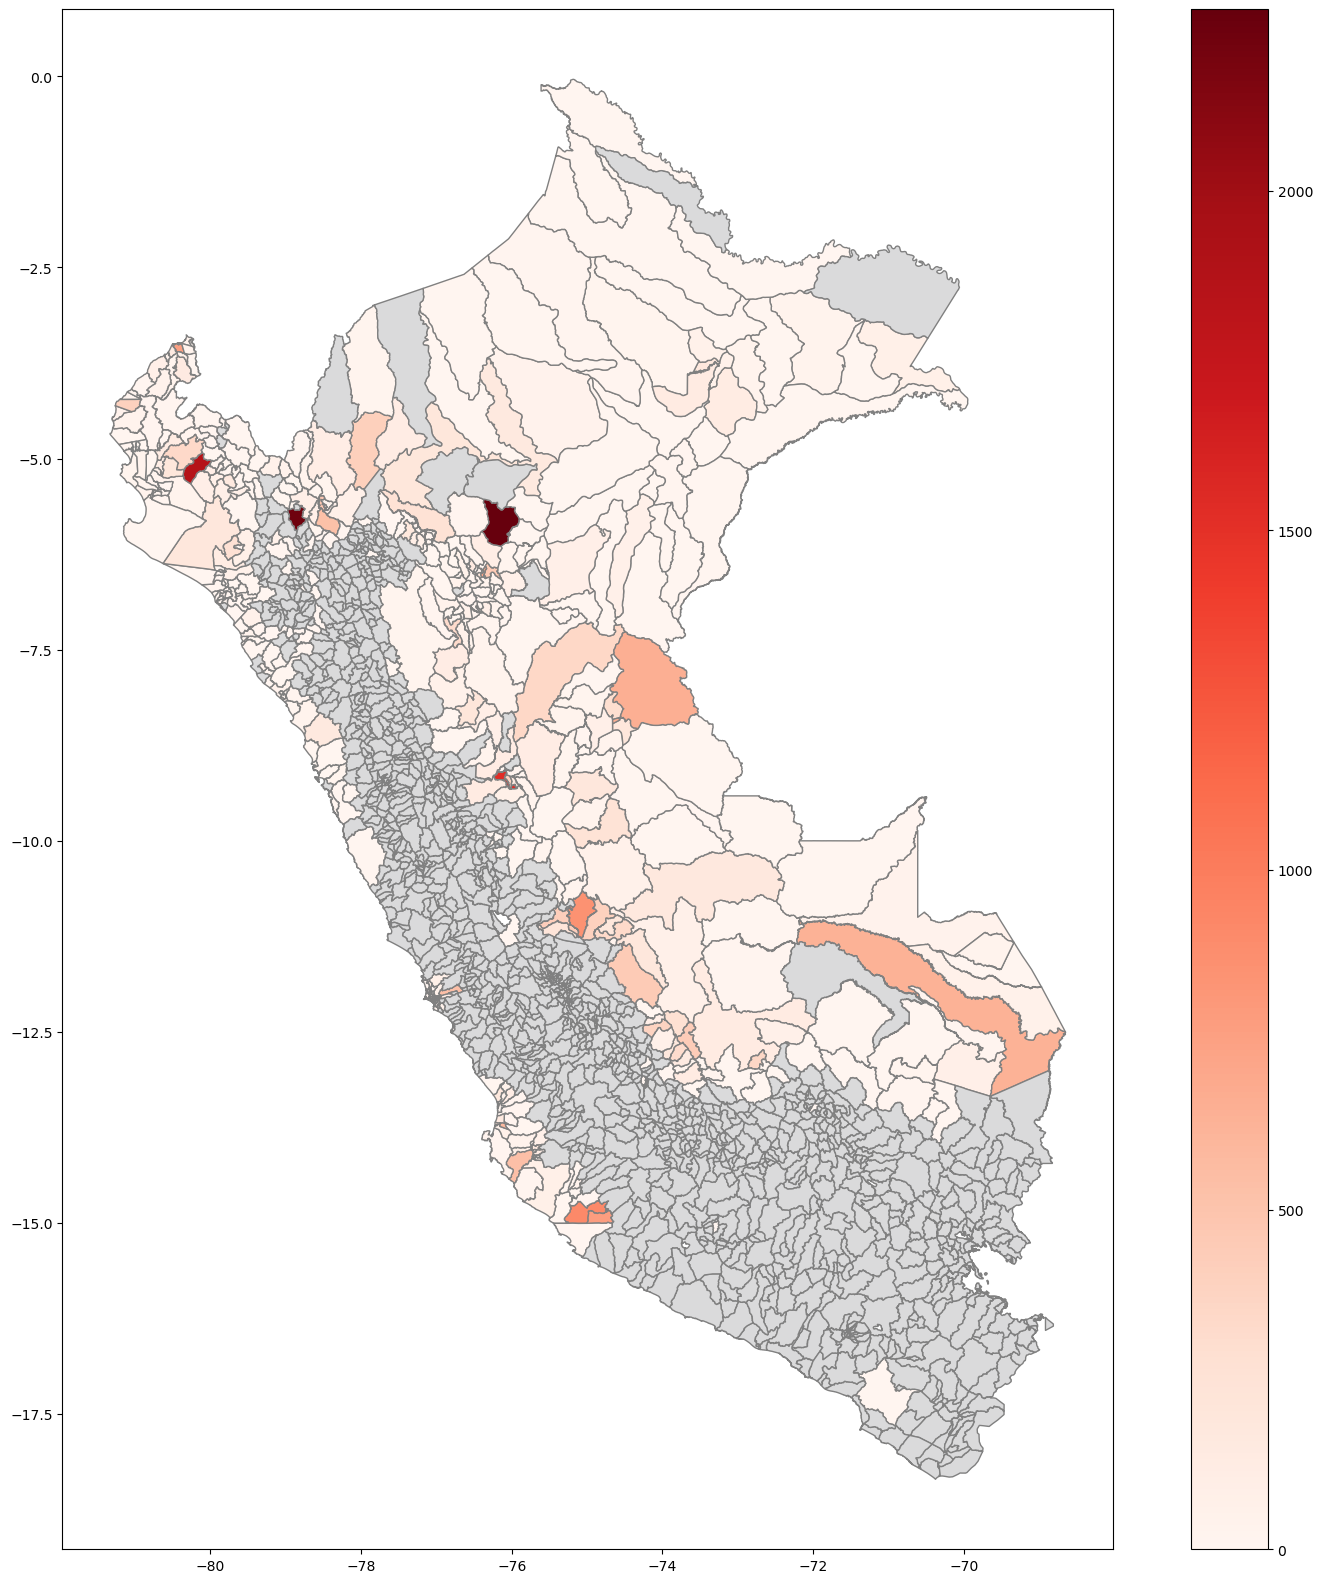

In [15]:
dengue_2021_dist.plot( column='Total_casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          missing_kwds= dict(color='#DADADB',),           
          legend = True )

## 4. Use geopandas to plot the number of cases in 2021by the province using a continuous legend. Do not forget to indicate the color of NA values. Use <a href="https://github.com/alexanderquispe/Diplomado_PUCP/tree/main/_data/LIMITE_DISTRITAL_2020_INEI">this shapefile</a>. For this task, you will have to aggregate shapefiles at the province level.

In [16]:
geo_prov = geo_dist.dissolve( by = 'IDPROV' ).reset_index()
geo_prov = geo_prov.drop(columns=['UBIGEO','NOMBDIST'])
geo_prov

,IDPROV,geometry,CCDD,NOMBDEP,NOMBPROV
0,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",01,AMAZONAS,CHACHAPOYAS
1,0102,"POLYGON ((-78.32620 -5.56382, -78.32625 -5.565...",01,AMAZONAS,BAGUA
2,0103,"POLYGON ((-77.93780 -6.03777, -77.93781 -6.037...",01,AMAZONAS,BONGARA
3,0104,"POLYGON ((-77.58527 -4.47289, -77.58594 -4.475...",01,AMAZONAS,CONDORCANQUI
4,0105,"POLYGON ((-77.93702 -6.69093, -77.93914 -6.693...",01,AMAZONAS,LUYA
...,...,...,...,...,...
191,2403,"POLYGON ((-80.19606 -3.61959, -80.19610 -3.620...",24,TUMBES,ZARUMILLA
192,2501,"POLYGON ((-73.27613 -9.68486, -73.27596 -9.685...",25,UCAYALI,CORONEL PORTILLO
193,2502,"POLYGON ((-72.18238 -11.01266, -72.18112 -11.0...",25,UCAYALI,ATALAYA
194,2503,"POLYGON ((-75.11866 -8.90145, -75.11869 -8.902...",25,UCAYALI,PADRE ABAD


In [17]:
dengue2021_prov = dengue2021_dist.groupby( ['Departamento', 'Provincia', 'Ubigeo_prov', 'Ubigeo_dep'], as_index = False).agg(Total_casos=('Total_casos', 'sum'))
dengue2021_prov = dengue2021_prov.rename(columns={'Ubigeo_prov':'IDPROV'})
dengue2021_prov

,Departamento,Provincia,IDPROV,Ubigeo_dep,Total_casos
0,AMAZONAS,BAGUA,0102,01,676
1,AMAZONAS,BONGARA,0103,01,0
2,AMAZONAS,CHACHAPOYAS,0101,01,0
3,AMAZONAS,CONDORCANQUI,0104,01,435
4,AMAZONAS,UTCUBAMBA,0107,01,719
...,...,...,...,...,...
87,TUMBES,ZARUMILLA,2403,24,72
88,UCAYALI,ATALAYA,2502,25,179
89,UCAYALI,CORONEL PORTILLO,2501,25,1241
90,UCAYALI,PADRE ABAD,2503,25,193


In [18]:
dengue_2021_prov = pd.merge(geo_prov, dengue2021_prov, how='left', on=['IDPROV'])
dengue_2021_prov = dengue_2021_prov.drop(columns=['Departamento','Provincia'])
dengue_2021_prov['IDPROV'] = dengue_2021_prov['IDPROV'].astype(str).astype(int)
dengue_2021_prov

,IDPROV,geometry,CCDD,NOMBDEP,NOMBPROV,Ubigeo_dep,Total_casos
0,101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",01,AMAZONAS,CHACHAPOYAS,01,0.0
1,102,"POLYGON ((-78.32620 -5.56382, -78.32625 -5.565...",01,AMAZONAS,BAGUA,01,676.0
2,103,"POLYGON ((-77.93780 -6.03777, -77.93781 -6.037...",01,AMAZONAS,BONGARA,01,0.0
3,104,"POLYGON ((-77.58527 -4.47289, -77.58594 -4.475...",01,AMAZONAS,CONDORCANQUI,01,435.0
4,105,"POLYGON ((-77.93702 -6.69093, -77.93914 -6.693...",01,AMAZONAS,LUYA,NaN,NaN
...,...,...,...,...,...,...,...
191,2403,"POLYGON ((-80.19606 -3.61959, -80.19610 -3.620...",24,TUMBES,ZARUMILLA,24,72.0
192,2501,"POLYGON ((-73.27613 -9.68486, -73.27596 -9.685...",25,UCAYALI,CORONEL PORTILLO,25,1241.0
193,2502,"POLYGON ((-72.18238 -11.01266, -72.18112 -11.0...",25,UCAYALI,ATALAYA,25,179.0
194,2503,"POLYGON ((-75.11866 -8.90145, -75.11869 -8.902...",25,UCAYALI,PADRE ABAD,25,193.0


In [19]:
dengue_2021_prov.dtypes

IDPROV            int32
geometry       geometry
CCDD             object
NOMBDEP          object
NOMBPROV         object
Ubigeo_dep       object
Total_casos     float64
dtype: object

<AxesSubplot:>

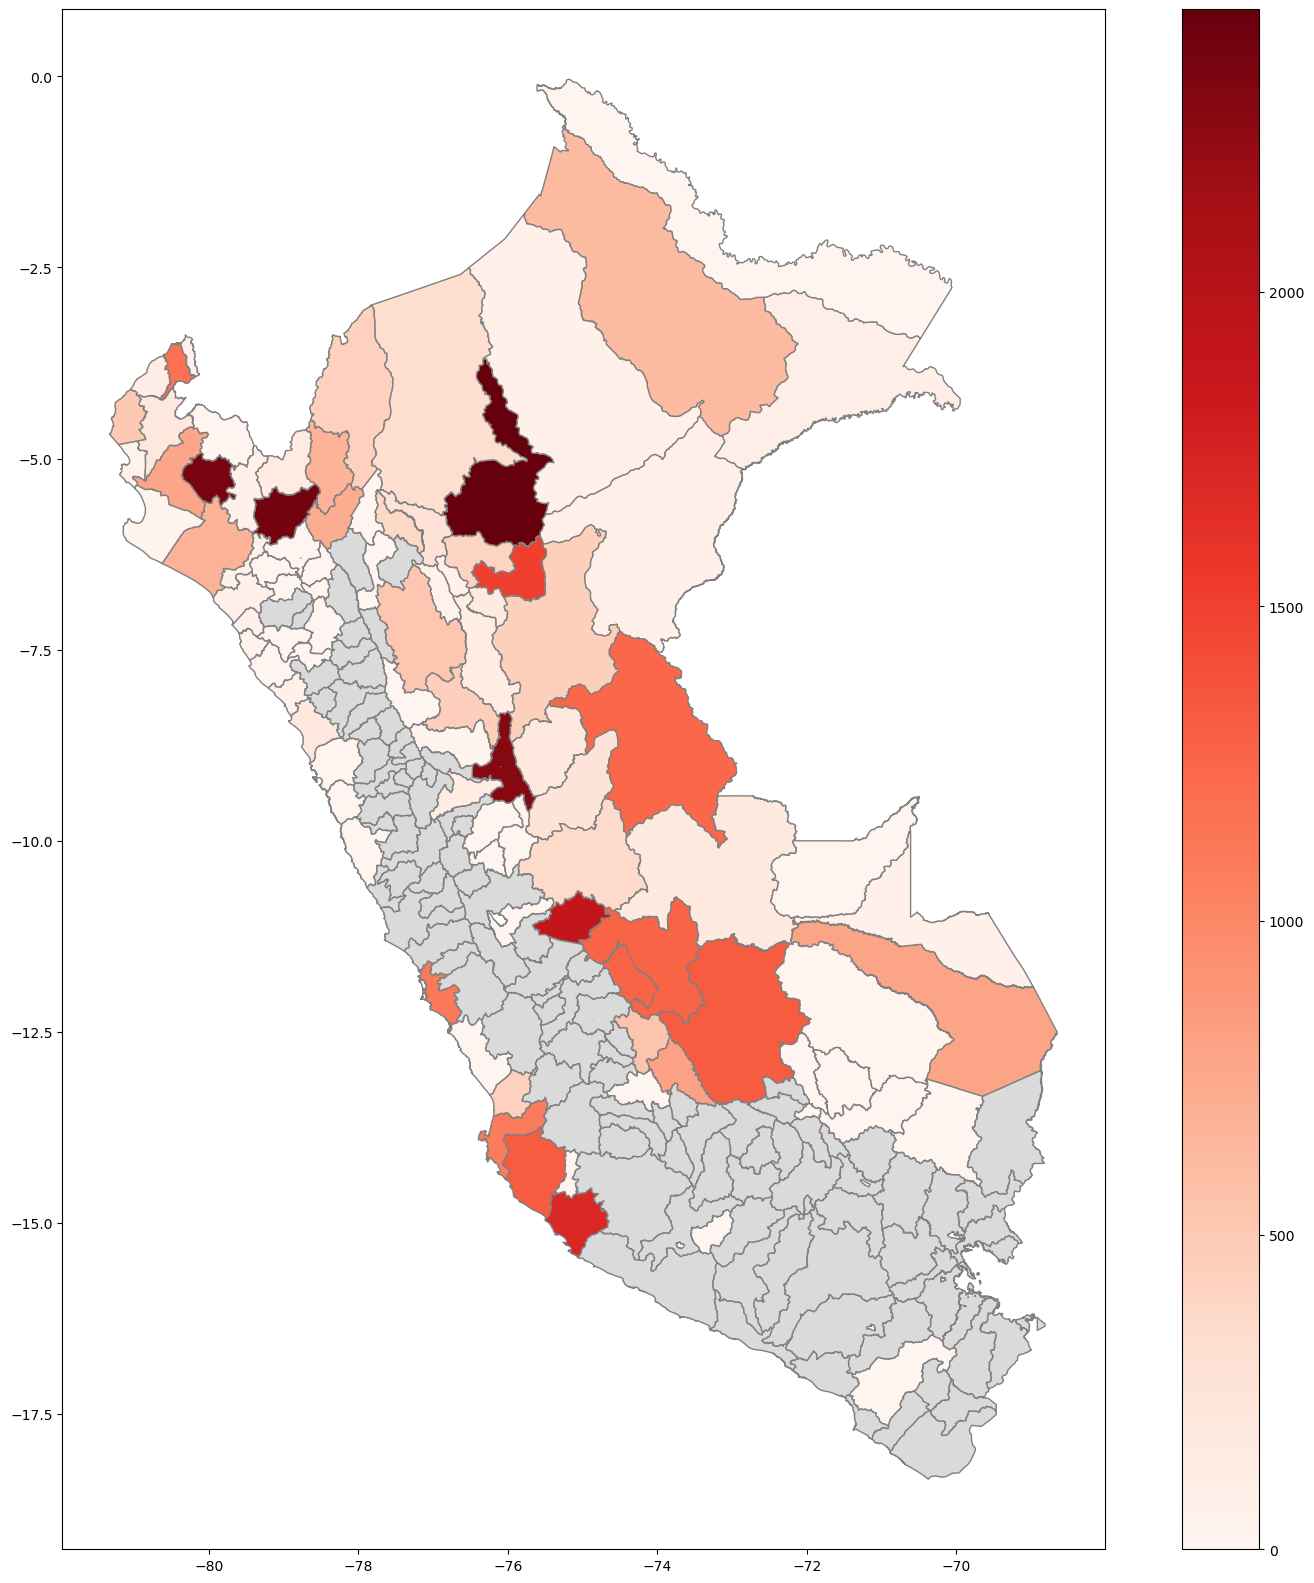

In [20]:
dengue_2021_prov.plot( column='Total_casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          missing_kwds= dict(color='#DADADB',),           
          legend = True )

## 5. Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use <a href="https://github.com/alexanderquispe/Diplomado_PUCP/tree/main/_data/LIMITE_DISTRITAL_2020_INEI">this shapefile</a>. For this task, you will have to aggregate shapefiles at the department level.

In [21]:
geo_dep = geo_prov.dissolve( by = 'CCDD' ).reset_index()
geo_dep = geo_dep.drop(columns=['IDPROV','NOMBPROV'])
geo_dep

,CCDD,geometry,NOMBDEP
0,01,"POLYGON ((-77.78625 -6.94929, -77.78681 -6.951...",AMAZONAS
1,02,"POLYGON ((-77.70012 -10.32263, -77.70189 -10.3...",ANCASH
2,03,"POLYGON ((-72.35713 -14.43812, -72.35740 -14.4...",APURIMAC
3,04,"POLYGON ((-71.32410 -17.06147, -71.32365 -17.0...",AREQUIPA
4,05,"POLYGON ((-74.50249 -15.16092, -74.50336 -15.1...",AYACUCHO
5,06,"POLYGON ((-78.81352 -7.42584, -78.81432 -7.425...",CAJAMARCA
6,07,"POLYGON ((-77.10456 -12.06373, -77.10449 -12.0...",CALLAO
7,08,"POLYGON ((-71.89418 -14.78954, -71.89579 -14.7...",CUSCO
8,09,"POLYGON ((-75.25853 -14.04317, -75.26012 -14.0...",HUANCAVELICA
9,10,"POLYGON ((-76.49368 -10.31116, -76.49334 -10.3...",HUANUCO


In [22]:
dengue2021_dep = dengue2021_prov.groupby( ['Departamento', 'Ubigeo_dep'], as_index = False).agg(Total_casos=('Total_casos', 'sum'))
dengue2021_dep = dengue2021_dep.rename(columns={'Ubigeo_dep':'CCDD'})
dengue2021_dep

,Departamento,CCDD,Total_casos
0,AMAZONAS,01,1830
1,ANCASH,02,26
2,AYACUCHO,05,1346
3,CAJAMARCA,06,2555
4,CALLAO,07,2
5,CUSCO,08,1341
6,HUANUCO,10,2735
7,ICA,11,4577
8,JUNIN,12,3168
9,LA LIBERTAD,13,382


In [23]:
dengue_2021_dep = pd.merge(geo_dep, dengue2021_dep, how='left', on=['CCDD'])
dengue_2021_dep = dengue_2021_dep.drop(columns=['Departamento'])
dengue_2021_dep['CCDD'] = dengue_2021_dep['CCDD'].astype(str).astype(int)
dengue_2021_dep

,CCDD,geometry,NOMBDEP,Total_casos
0,1,"POLYGON ((-77.78625 -6.94929, -77.78681 -6.951...",AMAZONAS,1830.0
1,2,"POLYGON ((-77.70012 -10.32263, -77.70189 -10.3...",ANCASH,26.0
2,3,"POLYGON ((-72.35713 -14.43812, -72.35740 -14.4...",APURIMAC,NaN
3,4,"POLYGON ((-71.32410 -17.06147, -71.32365 -17.0...",AREQUIPA,NaN
4,5,"POLYGON ((-74.50249 -15.16092, -74.50336 -15.1...",AYACUCHO,1346.0
5,6,"POLYGON ((-78.81352 -7.42584, -78.81432 -7.425...",CAJAMARCA,2555.0
6,7,"POLYGON ((-77.10456 -12.06373, -77.10449 -12.0...",CALLAO,2.0
7,8,"POLYGON ((-71.89418 -14.78954, -71.89579 -14.7...",CUSCO,1341.0
8,9,"POLYGON ((-75.25853 -14.04317, -75.26012 -14.0...",HUANCAVELICA,NaN
9,10,"POLYGON ((-76.49368 -10.31116, -76.49334 -10.3...",HUANUCO,2735.0


In [24]:
dengue_2021_dep.dtypes

CCDD              int32
geometry       geometry
NOMBDEP          object
Total_casos     float64
dtype: object

<AxesSubplot:>

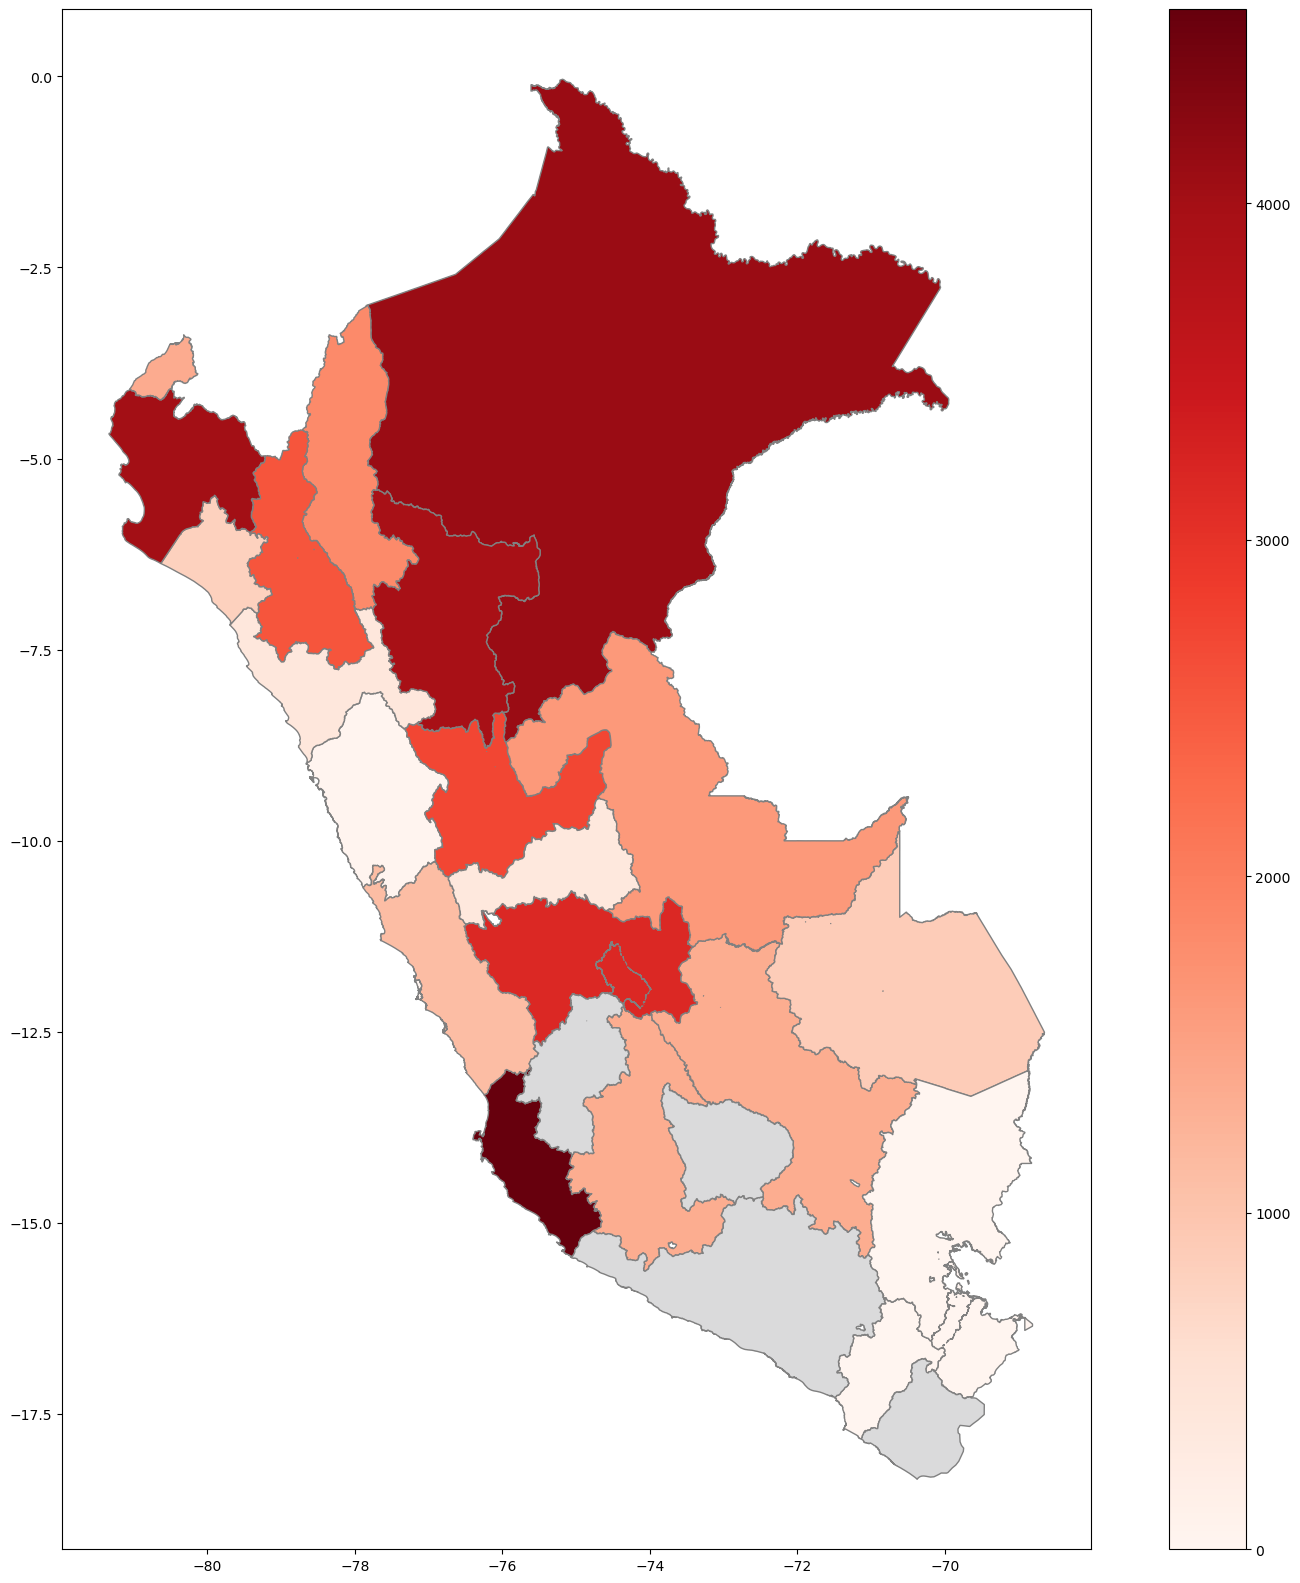

In [25]:
dengue_2021_dep.plot( column='Total_casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          missing_kwds= dict(color='#DADADB',),           
          legend = True )

## 6. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use <a href="https://github.com/alexanderquispe/Diplomado_PUCP/tree/main/_data/LIMITE_DISTRITAL_2020_INEI">this shapefile</a>. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.

In [91]:
dengue2021

,Año,Semana,Departamento,Provincia,Distrito,UBIGEO,Ubigeo_prov,Ubigeo_dep,Casos,Quarters
39,2021,3,CUSCO,LA CONVENCION,MEGANTONI,080914,0809,08,0,Q1
1478,2021,4,CUSCO,LA CONVENCION,MEGANTONI,080914,0809,08,0,Q1
1479,2021,2,CUSCO,LA CONVENCION,MEGANTONI,080914,0809,08,0,Q1
1526,2021,6,CUSCO,LA CONVENCION,MEGANTONI,080914,0809,08,0,Q1
1527,2021,8,CUSCO,LA CONVENCION,MEGANTONI,080914,0809,08,0,Q1
...,...,...,...,...,...,...,...,...,...,...
24625,2021,14,ICA,CHINCHA,SUNAMPE,110210,1102,11,2,Q2
24626,2021,14,LA LIBERTAD,PACASMAYO,PACASMAYO,130704,1307,13,1,Q2
24627,2021,15,LA LIBERTAD,CHEPEN,CHEPEN,130401,1304,13,2,Q2
24628,2021,16,LA LIBERTAD,CHEPEN,CHEPEN,130401,1304,13,2,Q2


In [92]:
def get_quarter(week):
    if week <= 13:
        return 'Q1'
    elif week <= 26:
        return 'Q2'
    elif week <= 39:
        return 'Q3'
    else:
        return 'Q4'

In [93]:
dengue2021['Quarters'] = dengue2021['Semana'].apply(lambda x: get_quarter(x))
dengue2021

,Año,Semana,Departamento,Provincia,Distrito,UBIGEO,Ubigeo_prov,Ubigeo_dep,Casos,Quarters
39,2021,3,CUSCO,LA CONVENCION,MEGANTONI,080914,0809,08,0,Q1
1478,2021,4,CUSCO,LA CONVENCION,MEGANTONI,080914,0809,08,0,Q1
1479,2021,2,CUSCO,LA CONVENCION,MEGANTONI,080914,0809,08,0,Q1
1526,2021,6,CUSCO,LA CONVENCION,MEGANTONI,080914,0809,08,0,Q1
1527,2021,8,CUSCO,LA CONVENCION,MEGANTONI,080914,0809,08,0,Q1
...,...,...,...,...,...,...,...,...,...,...
24625,2021,14,ICA,CHINCHA,SUNAMPE,110210,1102,11,2,Q2
24626,2021,14,LA LIBERTAD,PACASMAYO,PACASMAYO,130704,1307,13,1,Q2
24627,2021,15,LA LIBERTAD,CHEPEN,CHEPEN,130401,1304,13,2,Q2
24628,2021,16,LA LIBERTAD,CHEPEN,CHEPEN,130401,1304,13,2,Q2


In [96]:
dengue2021Q = dengue2021.groupby( ['Departamento', 'Ubigeo_dep', 'Quarters'], as_index = False).agg(Total_casos=('Casos', 'sum'))
dengue2021Q = dengue2021Q.rename(columns={'Ubigeo_dep':'CCDD'})
#We use the set_option to display all the table 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
dengue2021Q

,Departamento,CCDD,Quarters,Total_casos
0,AMAZONAS,01,Q1,599
1,AMAZONAS,01,Q2,609
2,AMAZONAS,01,Q3,583
3,AMAZONAS,01,Q4,39
4,ANCASH,02,Q1,3
5,ANCASH,02,Q2,21
6,ANCASH,02,Q3,2
7,ANCASH,02,Q4,0
8,AYACUCHO,05,Q1,812
9,AYACUCHO,05,Q2,355


In [97]:
#Here we can see that there are 4 region that dissapeared in the dataframe because of missing values
print(dengue_2021Q['NOMBDEP'].value_counts())

AMAZONAS         4
ANCASH           4
TUMBES           4
SAN MARTIN       4
PUNO             4
PIURA            4
PASCO            4
MOQUEGUA         4
MADRE DE DIOS    4
LORETO           4
LIMA             4
LAMBAYEQUE       4
LA LIBERTAD      4
JUNIN            4
ICA              4
HUANUCO          4
CUSCO            4
CALLAO           4
CAJAMARCA        4
AYACUCHO         4
UCAYALI          4
HUANCAVELICA     1
AREQUIPA         1
TACNA            1
APURIMAC         1
Name: NOMBDEP, dtype: int64


In [98]:
#For these 4 missing regions, we add them up using concat.
nuevas_filas = {'Departamento': ['APURIMAC', 'APURIMAC', 'APURIMAC', 'APURIMAC', 
                                 'AREQUIPA', 'AREQUIPA', 'AREQUIPA', 'AREQUIPA', 
                                 'HUANCAVELICA', 'HUANCAVELICA', 'HUANCAVELICA', 'HUANCAVELICA', 
                                 'TACNA', 'TACNA', 'TACNA', 'TACNA'],
                'CCDD': ['03', '03', '03', '03', '04', '04', '04', '04', '09', '09', '09', '09', '23', '23', '23', '23'],
                'Quarters': ['Q1', 'Q2', 'Q3', 'Q4'] * 4,
                'Total_casos': [0] * 16}

nuevas_filas_df = pd.DataFrame(nuevas_filas)
dengue2021Q_nf = pd.concat([dengue2021Q, nuevas_filas_df], ignore_index=True)
print(dengue2021Q_nf)


     Departamento CCDD Quarters  Total_casos
0        AMAZONAS   01       Q1          599
1        AMAZONAS   01       Q2          609
2        AMAZONAS   01       Q3          583
3        AMAZONAS   01       Q4           39
4          ANCASH   02       Q1            3
5          ANCASH   02       Q2           21
6          ANCASH   02       Q3            2
7          ANCASH   02       Q4            0
8        AYACUCHO   05       Q1          812
9        AYACUCHO   05       Q2          355
10       AYACUCHO   05       Q3          171
11       AYACUCHO   05       Q4            8
12      CAJAMARCA   06       Q1          594
13      CAJAMARCA   06       Q2          855
14      CAJAMARCA   06       Q3         1077
15      CAJAMARCA   06       Q4           29
16         CALLAO   07       Q1            1
17         CALLAO   07       Q2            0
18         CALLAO   07       Q3            1
19         CALLAO   07       Q4            0
20          CUSCO   08       Q1          714
21        

In [99]:
#Now we restart the maximum display in columns and rows. Next, we continue with the merge
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
dengue2021Q_nf = pd.merge(geo_dep, dengue2021Q_nf, how='left', on=['CCDD'])
dengue2021Q_nf['CCDD'] = dengue2021Q_nf['CCDD'].astype(str).astype(int)
dengue2021Q_nf

,CCDD,geometry,NOMBDEP,Departamento,Quarters,Total_casos
0,1,"POLYGON ((-77.78625 -6.94929, -77.78681 -6.951...",AMAZONAS,AMAZONAS,Q1,599
1,1,"POLYGON ((-77.78625 -6.94929, -77.78681 -6.951...",AMAZONAS,AMAZONAS,Q2,609
2,1,"POLYGON ((-77.78625 -6.94929, -77.78681 -6.951...",AMAZONAS,AMAZONAS,Q3,583
3,1,"POLYGON ((-77.78625 -6.94929, -77.78681 -6.951...",AMAZONAS,AMAZONAS,Q4,39
4,2,"POLYGON ((-77.70012 -10.32263, -77.70189 -10.3...",ANCASH,ANCASH,Q1,3
...,...,...,...,...,...,...
95,24,"POLYGON ((-80.84677 -4.18862, -80.84785 -4.189...",TUMBES,TUMBES,Q4,14
96,25,"POLYGON ((-72.17858 -11.01843, -72.17786 -11.0...",UCAYALI,UCAYALI,Q1,923
97,25,"POLYGON ((-72.17858 -11.01843, -72.17786 -11.0...",UCAYALI,UCAYALI,Q2,214
98,25,"POLYGON ((-72.17858 -11.01843, -72.17786 -11.0...",UCAYALI,UCAYALI,Q3,424


In [100]:
dengue2021Q_nf.dtypes

CCDD               int32
geometry        geometry
NOMBDEP           object
Departamento      object
Quarters          object
Total_casos        int64
dtype: object

In [101]:
dengue_2021Q1=dengue2021Q_nf[dengue2021Q_nf['Quarters']=='Q1']
dengue_2021Q2=dengue2021Q_nf[dengue2021Q_nf['Quarters']=='Q2']
dengue_2021Q3=dengue2021Q_nf[dengue2021Q_nf['Quarters']=='Q3']
dengue_2021Q4=dengue2021Q_nf[dengue2021Q_nf['Quarters']=='Q4']

<AxesSubplot:>

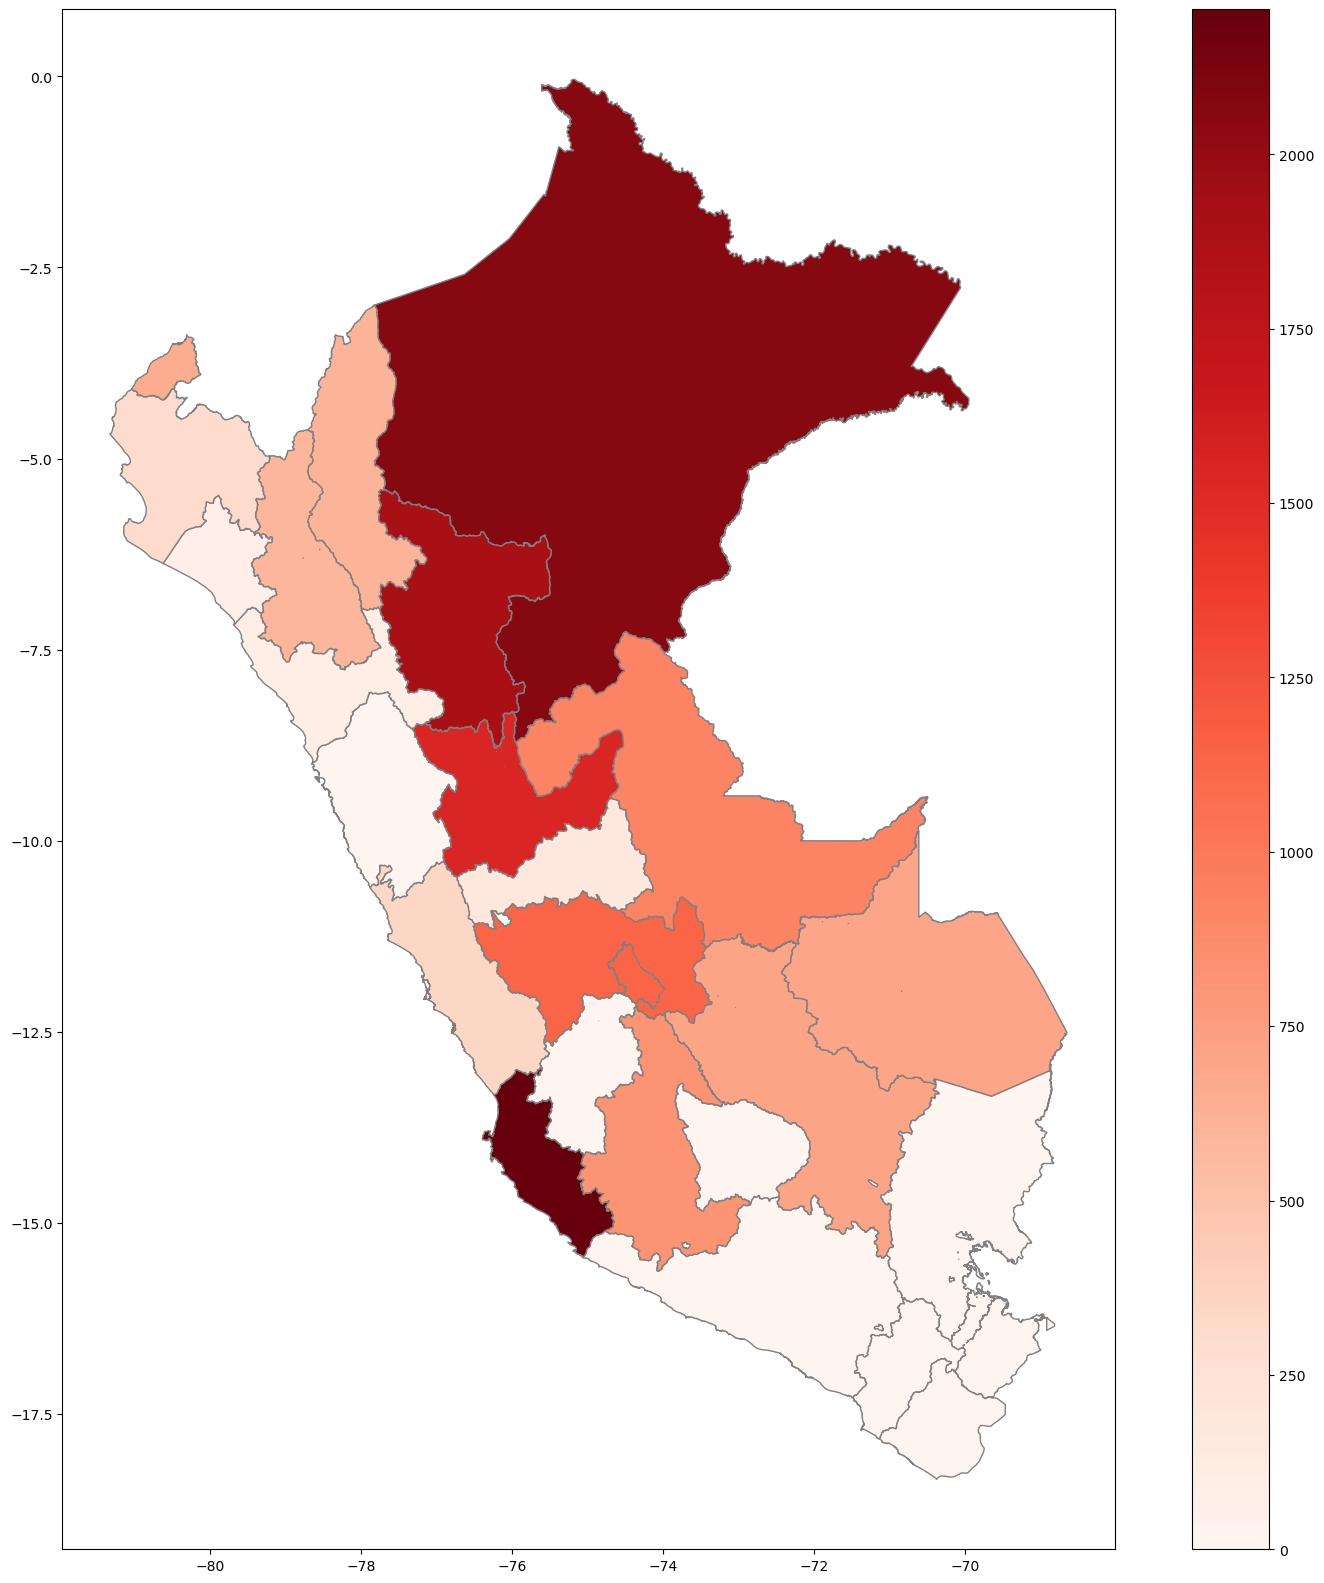

In [103]:
dengue_2021Q1.plot( column='Total_casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          missing_kwds= dict(color='#DADADB',),           
          legend = True )

<AxesSubplot:>

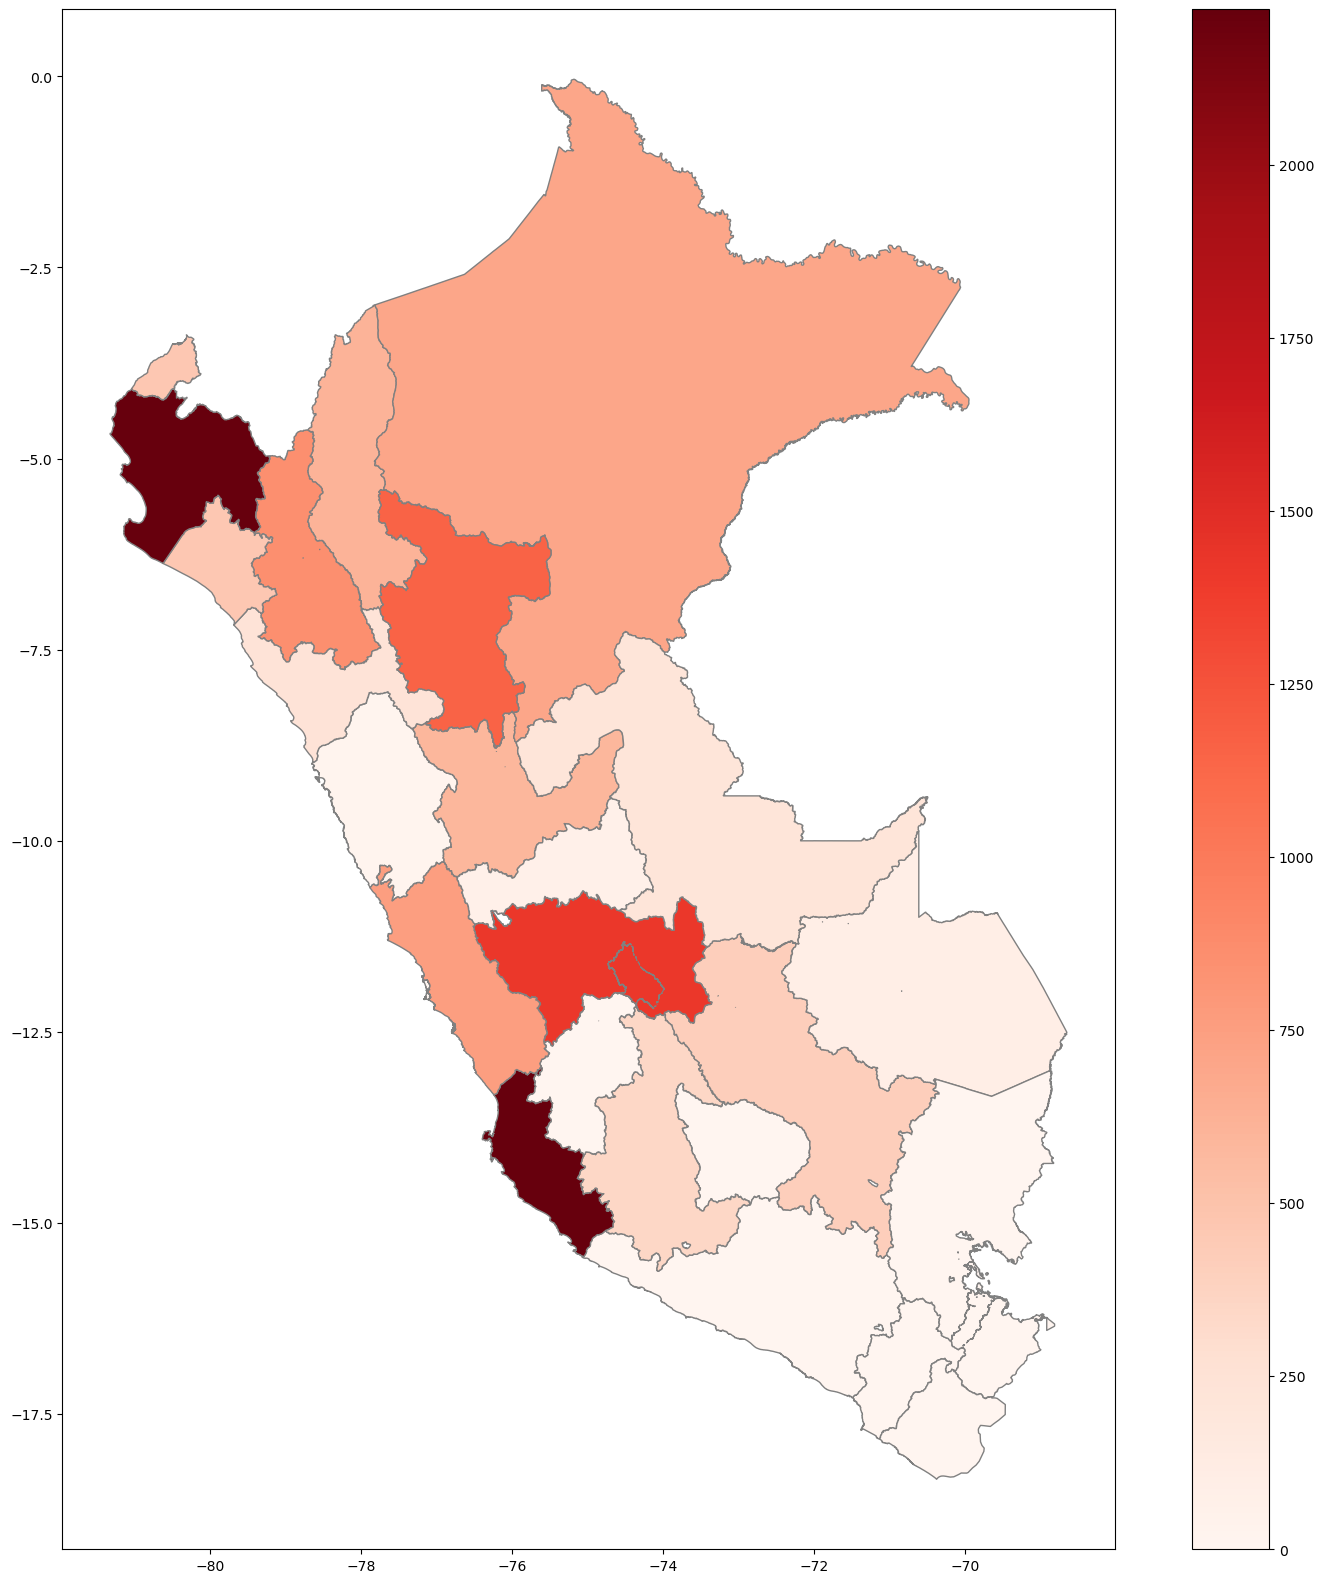

In [104]:
dengue_2021Q2.plot( column='Total_casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          missing_kwds= dict(color='#DADADB',),           
          legend = True )

<AxesSubplot:>

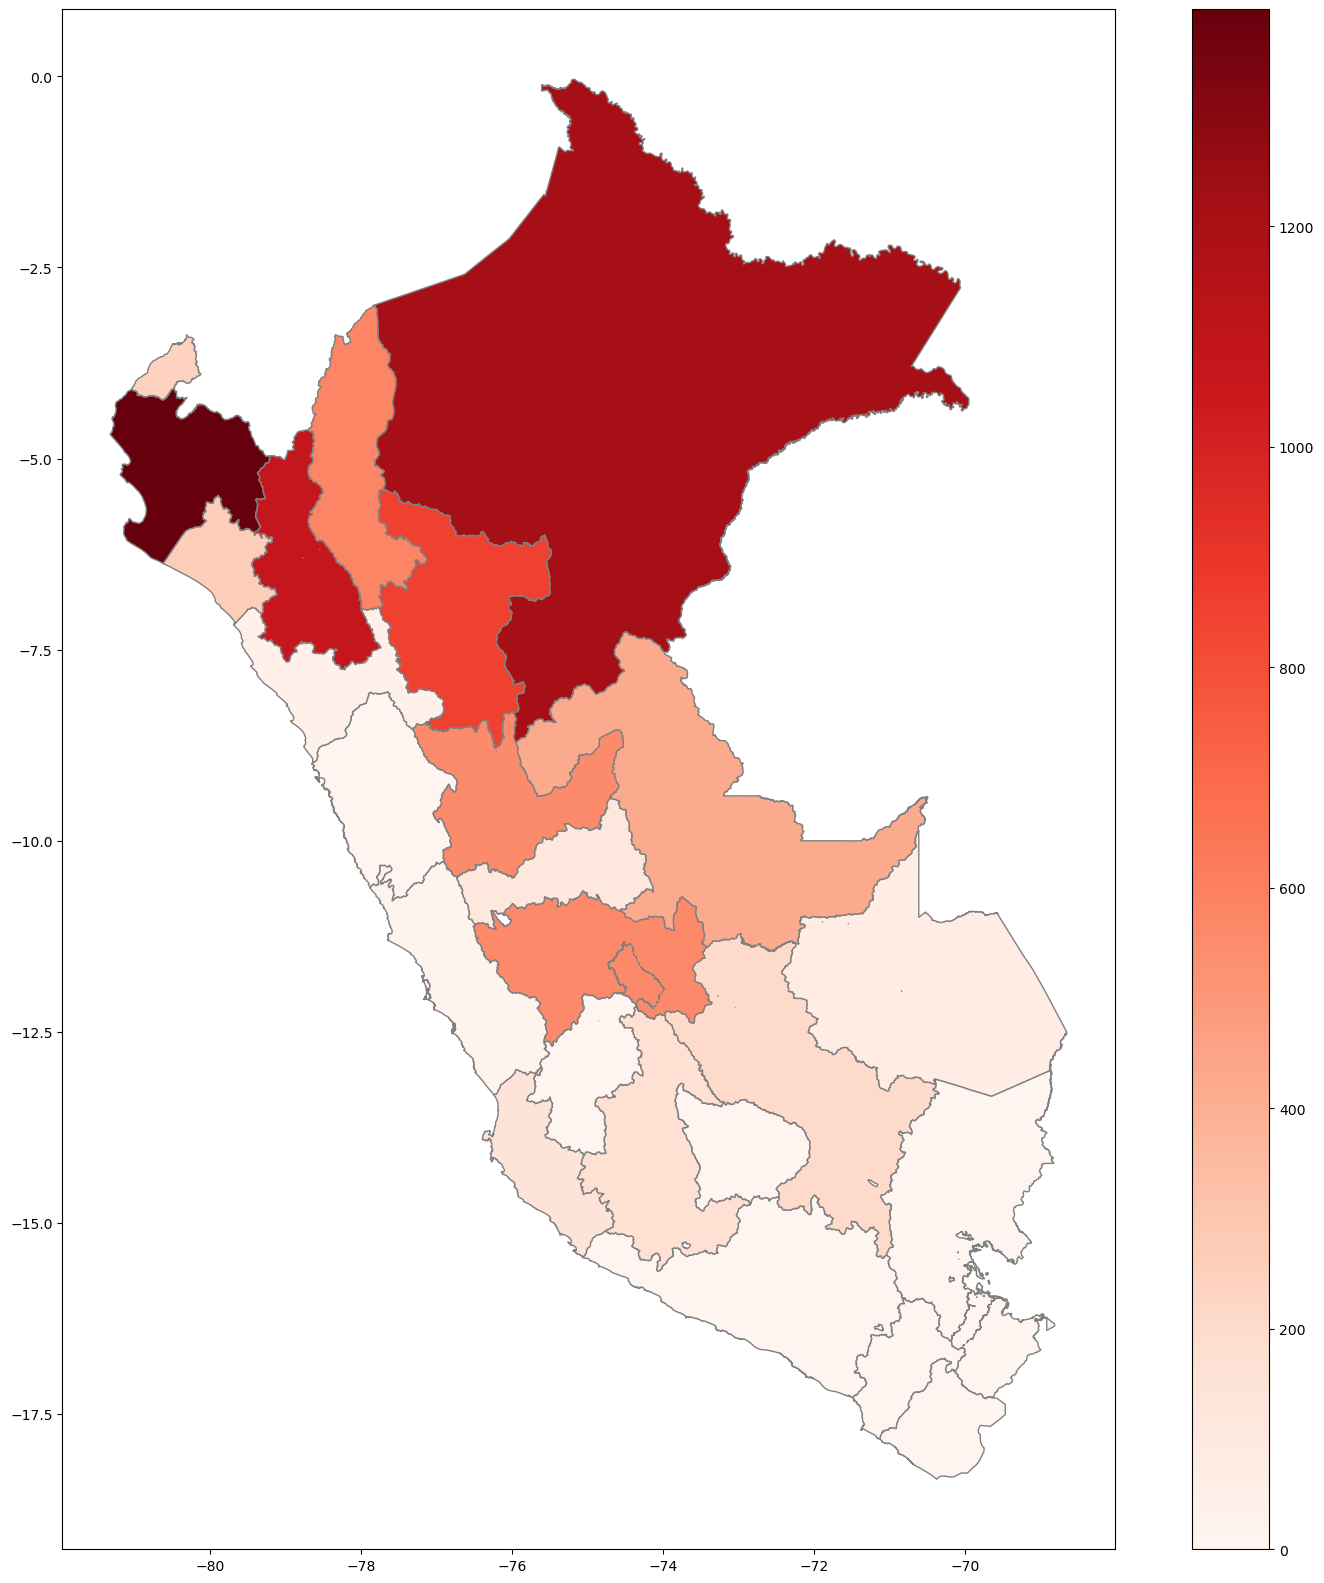

In [105]:
dengue_2021Q3.plot( column='Total_casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          missing_kwds= dict(color='#DADADB',),           
          legend = True )

<AxesSubplot:>

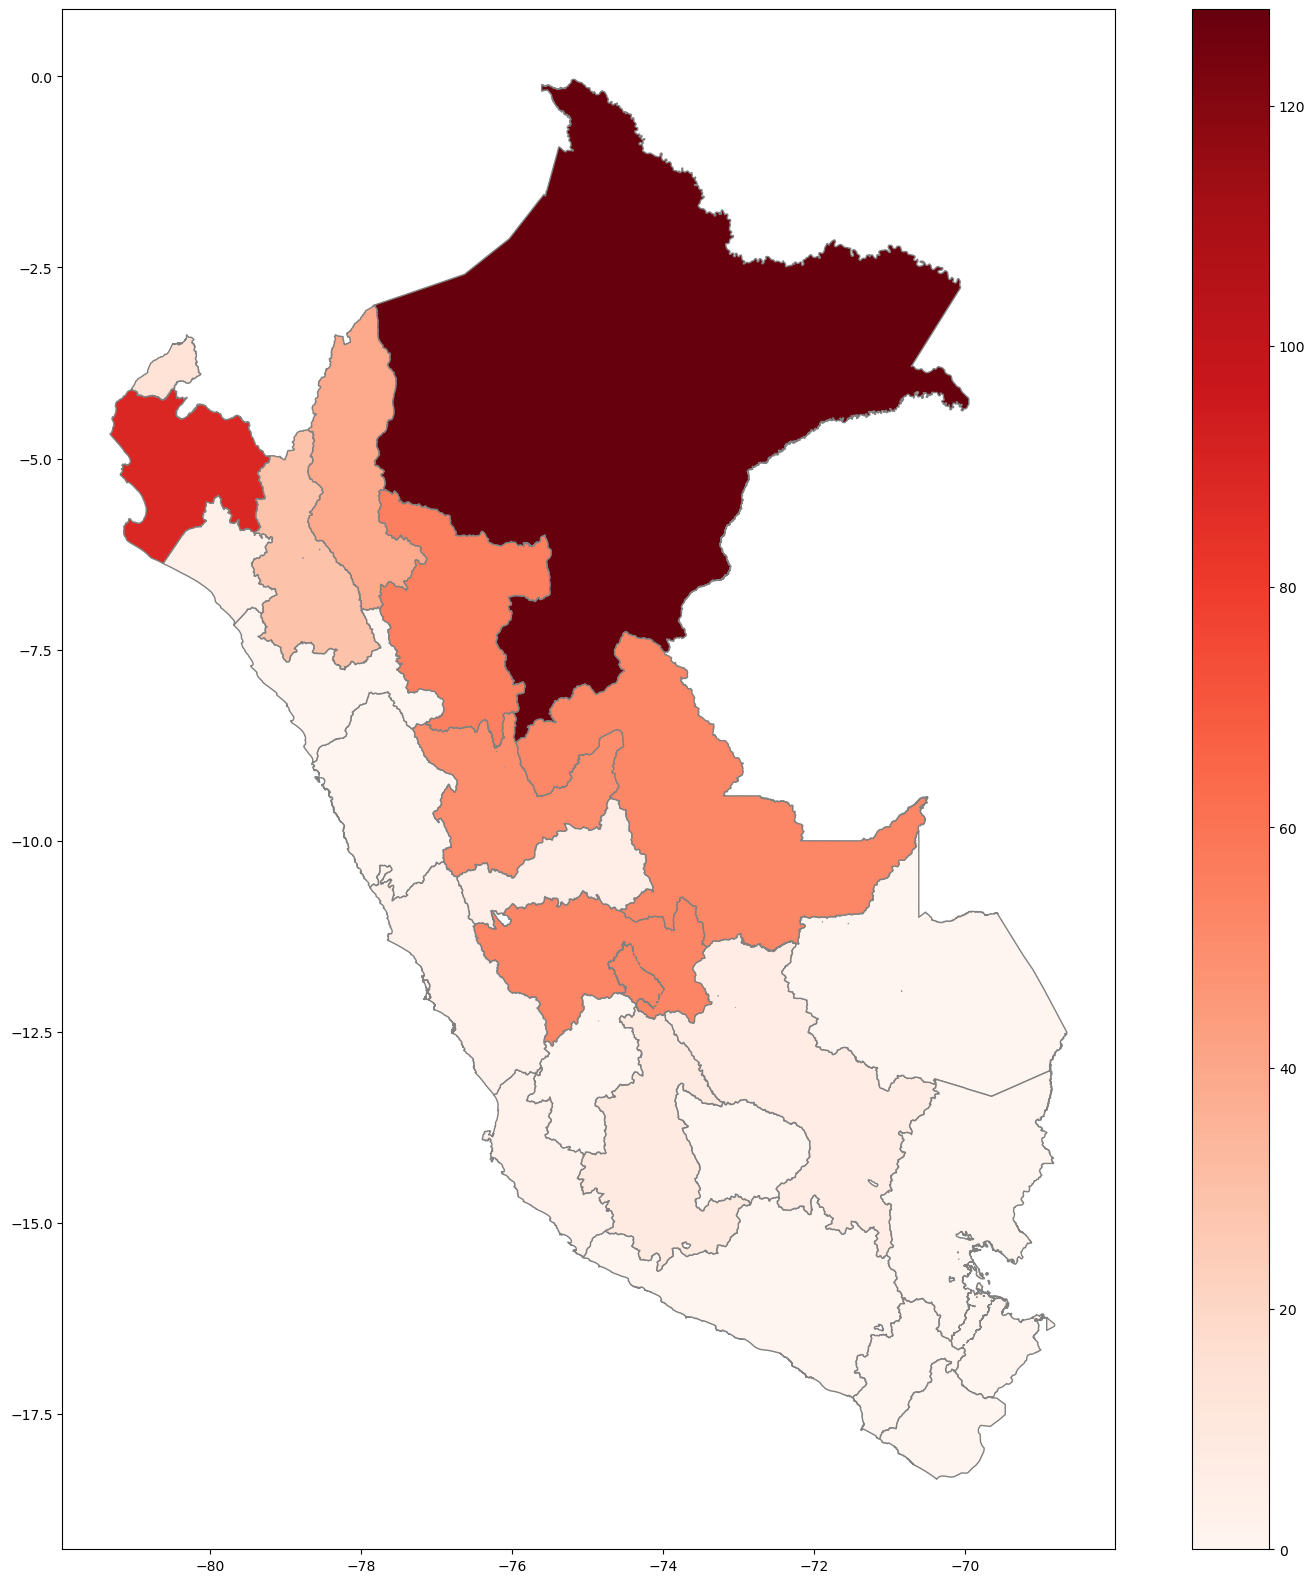

In [106]:
dengue_2021Q4.plot( column='Total_casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          missing_kwds= dict(color='#DADADB',),           
          legend = True )